# Assignment 7 Solutions

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

def linear_regression(sumx,sumy,sumxy,sumx2,n):
    b0 = (sumx2*sumy-sumx*sumxy)/(n*sumx2-sumx**2)
    b1 = (n*sumxy-sumx*sumy)/(n*sumx2-sumx**2)
    return b0,b1

def sigma_regression_summary_stats(sumx,sumy,sumxy,sumx2,sumy2,n,b0,b1):
    t1 = n*b0*b0
    t2 = 2*b0*b1*sumx
    t3 = b1**2*sumx2
    t4 = -2.0*b0*sumy
    t5 = -2.0*b1*sumxy
    t6 = sumy2
    v_error = n - 2

    sigma = np.sqrt(1.0/v_error*(t1+t2+t3+t4+t5+t6))

    return float(sigma)

## Question 1

An article on estimating 28-day strength of concrete considered regressing y = 28-day standard-cured strength (psi) against x = accelerated strength (psi). Suppose the equation of the true regression line is y = 1789 + 0.7x.

(a) What is the expected value of 28-day strength when accelerated strength = 2445? 

(b) By how much can we expect 28-day strength to change when accelerated strength increases by 1 psi? 

(c) Answer part (b) for an increase of 108 psi. (Give answer accurate to 1 decimal place.)

(d) Answer part (b) for a decrease of 108 psi. (Give answer accurate to 1 decimal place.) 

## Question 2

Suppose that in a certain chemical process the reaction time y (hr) is related to the temperature (°F) in the chamber in which the reaction takes place according to the simple linear regression model with equation y = 4.7 – 0.016x and σ = 0.085.

(a) What is the expected change in reaction time for a 1°F increase in temperature?

What is the expected change in reaction time for a 6°F increase in temperature? (Give answer accurate to 3 decimal places.)
 

(b) What is the expected reaction time when temperature is 170°F? (Give answer accurate to 2 decimal places.) 

What is the expected reaction time when temperature is 190°F? (Give answer accurate to 2 decimal places.)

(c) Suppose five observations are made independently on reaction time, each one for a temperature of 190°F. What is the probability that all five times are between 1.48 and 1.84 hours? (Give answer accurate to 3 decimal places.) 

(d) What is the probability that two independently observed reaction times for temperatures 1° apart are such that the time at the higher temperature exceeds the time at the lower temperature? (Give answer accurate to 3 decimal places.)

## Question 3

The accompanying data on x = current density (mA/cm$^2$) and y = rate of deposition (µm/min) appeared in the article "Plating of 60/40 Tin/Lead Solder for Head Termination Metallurgy" (Plating and Surface Finishing, Jan. 1997: 38-40). Do you agree with the claim by the article's author that "a linear relationship was obtained from the tin-lead rate of deposition as a function of current density"? (Give answer accurate to 3 decimal places.)

x	20	40	60	80
y  	  0.24  	  1.20  	  1.71  	  2.22  

$r^2$ = 

Explain your reasoning.

## Question 4

A scatter plot along with the least squares line of x = rainfall volume (m3) and y = runoff volume (m3) were given for a particular location. The accompanying values were read from the plot.

(a) Does a scatter plot of the data support the use of the simple linear regression model? 

(b) Calculate point estimates of the slope and intercept of the population regression line. (Give answers accurate to 3 decimal places.)

(c) Calculate a point estimate of the true average runoff volume when rainfall volume is 50. (Give answer accurate to 2 decimal places.) 

(d) Calculate a point estimate of the standard deviation σ. (Give answer accurate to 2 decimal places.) 

(e) What proportion of the observed variation in runoff volume can be attributed to the simple linear regression relationship between runoff and rainfall? (Give answer accurate to 4 decimal places.)

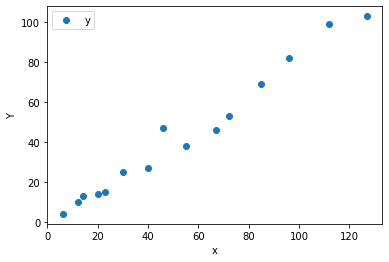

In [52]:
x = np.array([6,12,14,20,23,30,40,46,55,67,72,85,96,112,127])
y = np.array([4,10,13,14,15,25,27,47,38,46,53,69,82,99,103])

df = pd.DataFrame({'x':x, 'y':y})

df.plot('x','y',style='o')
plt.ylabel('Y')
plt.show()

In [53]:

result = sm.ols('y ~ x',df).fit()
print(result.summary())

r2 = result.rsquared
r2_reduced = result.rsquared_adj
yint = result.params[0]
slope = result.params[1]

x_prediction = 50
y_prediction = slope*x_prediction + yint
print()
print("c) y_prediction = %0.2f" % y_prediction)

N_model = 2
v_model = N_model - 1

N = len(x)
v_total = N - 1
v_error = v_total - v_model

SS_total = (N-1)*y.var()

SS_model = r2_reduced*SS_total
SS_model2 = r2*SS_total

SS_error = SS_total - SS_model
SS_error2 = SS_total - SS_model2

MS_error=SS_error/v_error
sigma = np.sqrt(MS_error)

MS_error2=SS_error2/v_error
sigma2 = np.sqrt(MS_error2)

print()
print("d1) sigma = %0.2f" % sigma)
print("d2) sigma2 = %0.2f" % sigma2)

print()
print("e) r^2 = %0.4f" % r2)

sumx = x.sum()
sumy = y.sum()
xy = x * y
x2 = x * x
y2 = y * y
sumxy = xy.sum()
sumx2 = x2.sum()
sumy2 = y2.sum()
n = len(x)

b0,b1 = linear_regression(sumx,sumy,sumxy,sumx2,n)

sigma = sigma_regression_summary_stats(sumx,sumy,sumxy,sumx2,sumy2,n,b0,b1)

print()
print("Part d = ", sigma)



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     533.6
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           6.12e-12
Time:                        21:13:26   Log-Likelihood:                -44.949
No. Observations:                  15   AIC:                             93.90
Df Residuals:                      13   BIC:                             95.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0164      2.367     -0.852      0.4

## Question 5

The following summary statistics were obtained from a study that used regression analysis to investigate the relationship between pavement deflection and surface temperature of the pavement at various locations on a state highway. Here x = temperature (°F) and y = deflection adjustment factor (y ≥ 0).
n = 17       Σxi = 1448.6       Σyi = 10.57
Σxi 2 = 147414.45       Σxiyi = 987.536
Σyi 2 = 7.8653

(a) Compute eta hat1, eta hat0, and the equation of the estimated regression line. Graph the estimated line. (Do this on paper. Your instructor may ask you to turn in this work. Give answers accurate to 4 decimal places.)
y^^\^ =    seenKey 0.3131	+    seenKey 0.0036  x

(b) What is the estimate of expected change in the deflection adjustment factor when temperature is increased by 1°F? (Give answer accurate to 4 decimal places.) 
   seenKey 0.0036  

(c) Suppose temperature were measured in °C rather than in °F. What would be the estimated regression line? Answer part (b) for an increase of 1°C. [Hint: °F = (9/5)°C + 32; now substitute for the "old x" in terms of the "new x."] (Give answers accurate to 4 decimal places.)
y^^\^ =    seenKey 0.4290	+    seenKey 0.0065  x

(d) If a 200°F surface temperature were within the realm of possibility, would you use the estimated line of part (a) to predict deflection factor for this temperature? Why or why not? 


In [54]:
sumx = 1456.9
sumy = 10.85
sumx2 = 158853.53
sumxy = 951.054
sumy2 = 7.8732
n = 15

yint, slope = linear_regression(sumx,sumy,sumxy,sumx2,n)

print(yint, slope)

sigma = sigma_regression_summary_stats(sumx,sumy,sumxy,sumx2,sumy2,n,yint,)
print("Sigma = ", sigma)

dx = 1
delta = slope*dx
print()
print(delta)

yintF = yint + slope*32
slopeF = slope*9/5
print()
print(yintF, slopeF)

y_prediction = yint + slope*200.0
print()
print(y_prediction)

1.2986600563145532 -0.005923468216568263


TypeError: sigma_regression_summary_stats() missing 1 required positional argument: 'b1'

## Question 6

The following data is representative of that reported in an article on nitrogen emissions, with x = burner area liberation rate (MBtu/hr-ft2) and y = NOx emission rate (ppm).
x	  100	125	125	150	150	200	200	250	250	300	300	350	400	400
y    	  140  	130  	170  	220  	190  	300  	270  	390  	420  	440  	400  	590  	600  	650  
(a) Assuming that the simple linear regression model is valid, obtain the least squares estimate of the true regression line. (Give answers accurate to 2 decimal places.)
y^^\^ =    seenKey -49.35  +    seenKey 1.70  x

(b) What is the estimate of expected NOx emission rate when burner area liberation rate equals 250? (Give answer accurate to 1 decimal place.)

(c) Estimate the amount by which you expect NOx emission rate to change when burner area liberation rate is decreased by 60. (Give answer accurate to 1 decimal place.) 

(d) Would you use the estimated regression line to predict emission rate for a liberation rate of 500? Why or why not?

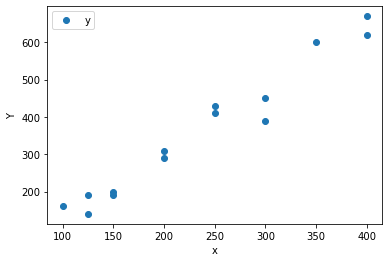

In [33]:
x = np.array([ 100,	125,	125,	150,	150,	200,	200,	250,	250,	300,	300,	350,	400,	400])
y = np.array([160,  	140,  	190,  	200,  	190,  	310,  	290,  	410,  	430,  	450,  	390  	,600 ,620,670 ])

df = pd.DataFrame({'x':x, 'y':y})

df.plot('x','y',style='o')
plt.ylabel('Y')
plt.show()

In [59]:
result = sm.ols('y ~ x',df).fit()
# print(result.summary())

r2 = result.rsquared
r2_reduced = result.rsquared_adj
yint = result.params[0]
slope = result.params[1]

print("a1", yint, slope)

yintr = round(yint,2)
sloper = round(slope,2)

print("a2", yintr, sloper)

x_prediction = 250.0
y_prediction = slope*x_prediction + yint
print()
print("b1) y_prediction = %0.1f" % y_prediction)

y_predictionr = sloper*x_prediction + yintr
print("b2) y_predictionr = %0.1f" % y_predictionr)

print("c1) delta = %0.1f" % (slope*-70))
print("c2) delta = %0.1f" % (sloper*-70))

a1 -2.0164301717699695 0.8388154690391922
a2 -2.02 0.84

b1) y_prediction = 207.7
b2) y_predictionr = 208.0
c1) delta = -58.7
c2) delta = -58.8
